In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

DEVICE:  cuda


In [3]:
#Analyze different time periods for RNN
for i in range(1023,1027):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(f"Runtest_{i}",df.groupby("Metric")["Relative_MSE"].mean())

Runtest_1023 Metric
ATR                0.676129
Squared_Returns    1.346297
Name: Relative_MSE, dtype: float64
Runtest_1024 Metric
ATR                6.213594
Squared_Returns    7.287342
Name: Relative_MSE, dtype: float64
Runtest_1025 Metric
ATR                0.288375
Squared_Returns    2.595777
Name: Relative_MSE, dtype: float64
Runtest_1026 Metric
ATR                2.382405
Squared_Returns    3.144229
Name: Relative_MSE, dtype: float64


We can see that ATR consistently outperforms squared returns, doing best when there is ample amounts of training data. This might demonstrate ATR's ability to not overfit the model.

In [4]:
#Analyze diff layer combos LSTM
for i in range(32,41):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(i,df.groupby('Metric')['Relative_MSE'].mean())

32 Metric
ATR                0.830029
Squared_Returns    0.895952
Name: Relative_MSE, dtype: float64
33 Metric
ATR                0.771406
Squared_Returns    0.628715
Name: Relative_MSE, dtype: float64
34 Metric
ATR                0.799177
Squared_Returns    0.824391
Name: Relative_MSE, dtype: float64
35 Metric
ATR                0.724802
Squared_Returns    0.823542
Name: Relative_MSE, dtype: float64
36 Metric
ATR                0.794125
Squared_Returns    0.964812
Name: Relative_MSE, dtype: float64
37 Metric
ATR                0.680897
Squared_Returns    0.544277
Name: Relative_MSE, dtype: float64
38 Metric
ATR                0.751495
Squared_Returns    0.594292
Name: Relative_MSE, dtype: float64
39 Metric
ATR                0.628070
Squared_Returns    0.565187
Name: Relative_MSE, dtype: float64
40 Metric
ATR                0.751546
Squared_Returns    0.677466
Name: Relative_MSE, dtype: float64


In [8]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10033
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.sort_values(by="MAPE").groupby(["ETF","Metric"])["MAPE"].mean()
df_final.to_csv('../output/analysis/final_df.csv')

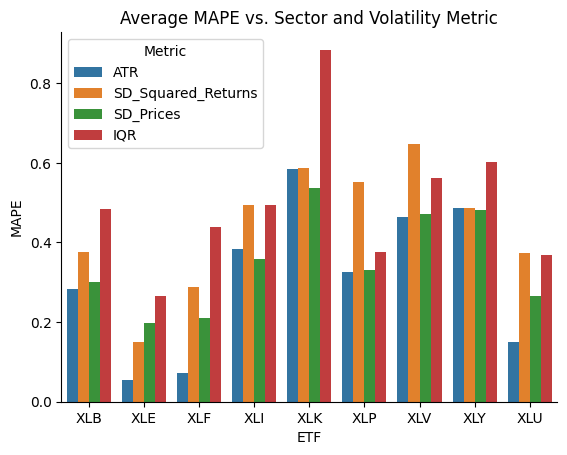

In [ ]:
sns.barplot(df_final,x="ETF",y="MAPE",hue="Metric",errorbar=None)
sns.despine()
plt.title("Average MAPE vs. Sector and Volatility Metric")
out_root = '../output/analysis/'
plt.savefig(os.path.join(out_root,"avg_errors"))


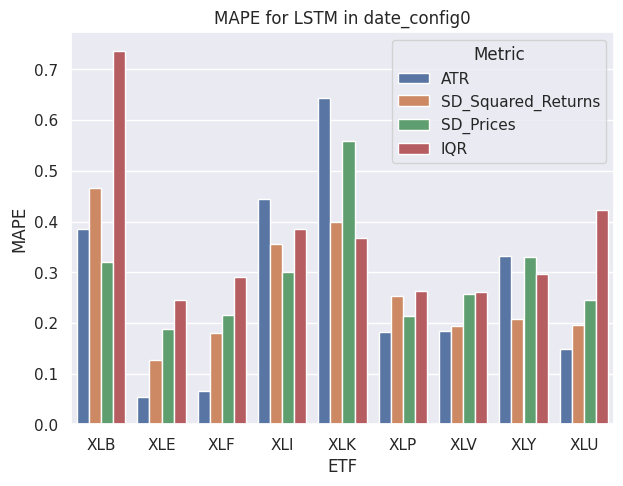

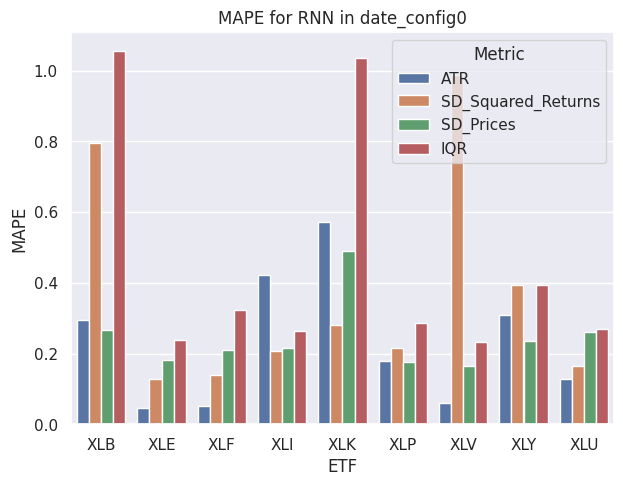

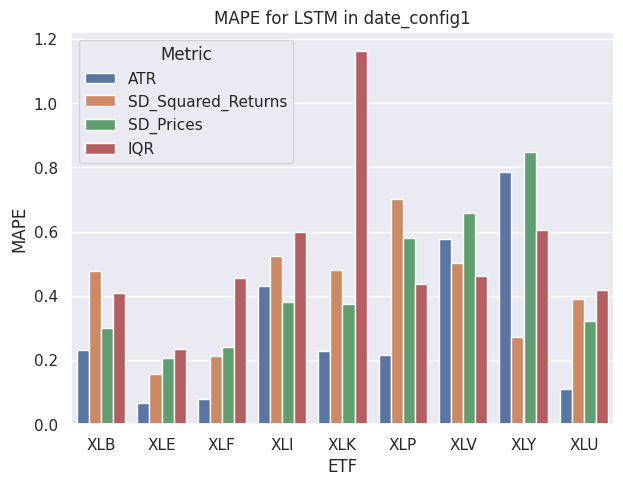

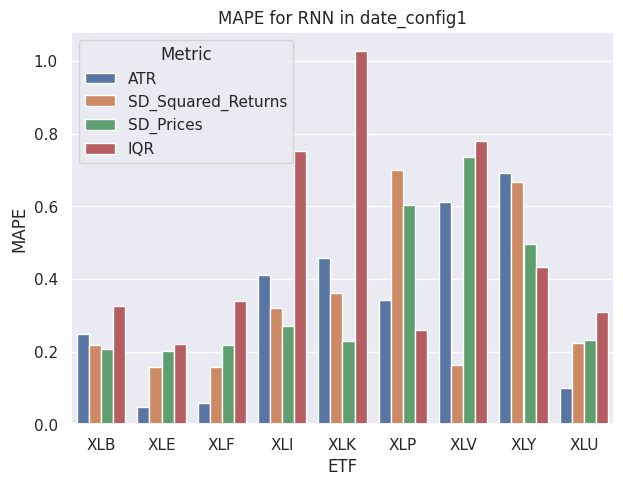

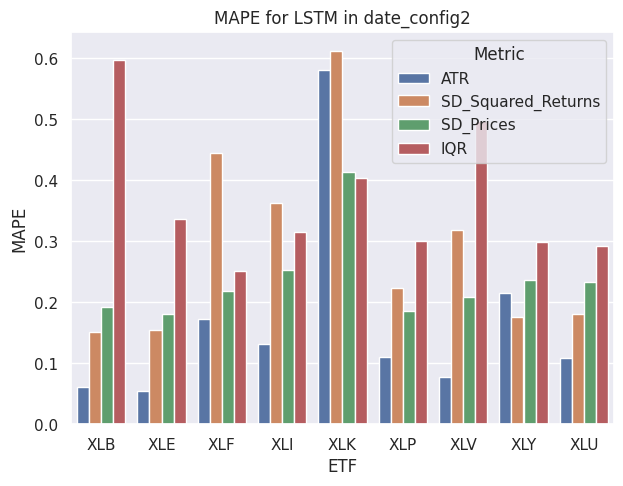

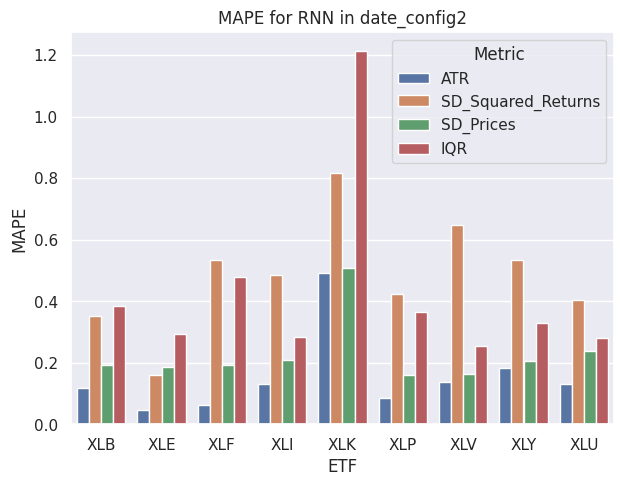

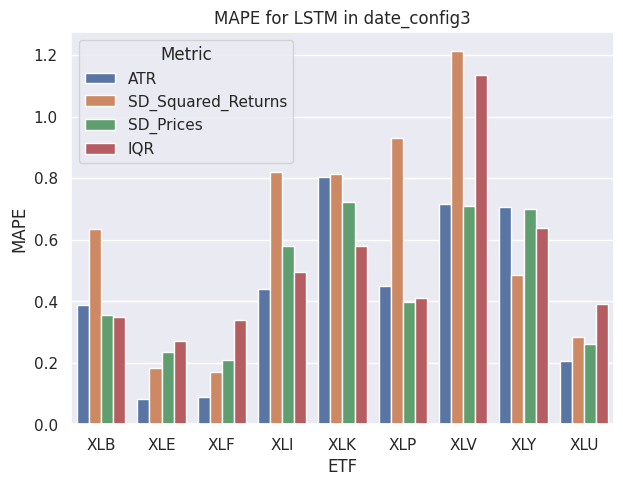

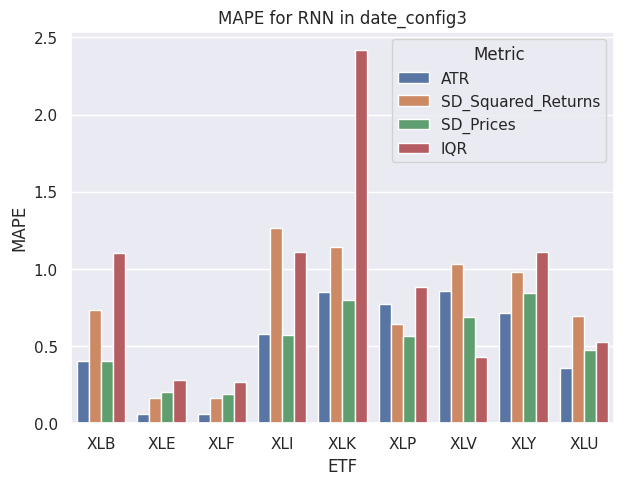

In [28]:
# show results
accuracy_metric = "MAPE"
for date,date_chunk in df_final.groupby("Date"): #returns (date_name,grouped section of df)
    for model,model_chunk in date_chunk.groupby("Model"):
        fig,ax = plt.subplots()
        sns.barplot(model_chunk,x="ETF",y=accuracy_metric,hue = "Metric", ax = ax)
        fig.tight_layout()
        ax.set_title(f"{accuracy_metric} for {model} in {date}")
        fig.savefig(fname=f"../output/analysis/{accuracy_metric}_{date}_{model}")

In [4]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10033
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["Final_Value"].mean()

ETF  Metric            
XLB  ATR                    940.172503
     IQR                   1037.991765
     SD_Prices             1086.182314
     SD_Squared_Returns     970.049431
XLE  ATR                    937.964119
     IQR                    989.845967
     SD_Prices              897.222211
     SD_Squared_Returns     909.050810
XLF  ATR                   1006.959309
     IQR                   1051.083293
     SD_Prices              967.325789
     SD_Squared_Returns    1004.078740
XLI  ATR                   1098.580692
     IQR                   1066.302036
     SD_Prices             1038.451612
     SD_Squared_Returns    1082.188098
XLK  ATR                   1206.513912
     IQR                   1032.099856
     SD_Prices             1052.096465
     SD_Squared_Returns    1114.718144
XLP  ATR                    967.151448
     IQR                    970.751377
     SD_Prices              997.286261
     SD_Squared_Returns    1015.620242
XLU  ATR                    907.601943
 

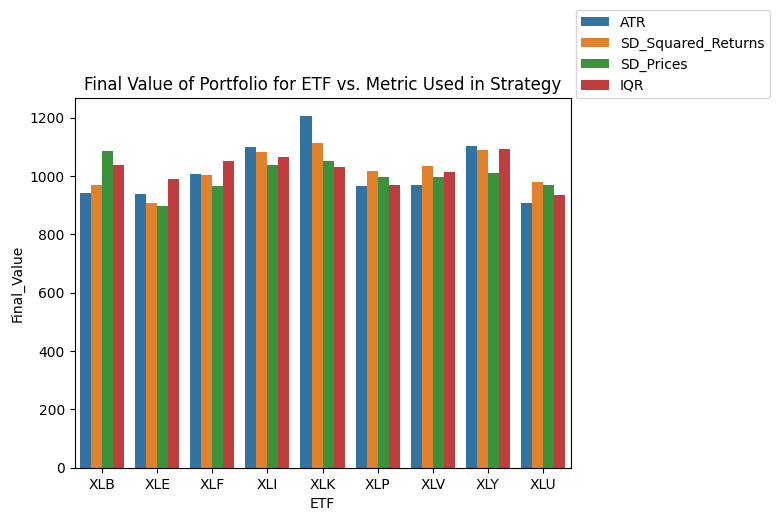

In [6]:
fig,ax = plt.subplots()
sns.barplot(df_final,x="ETF",y="Final_Value",hue="Metric",errorbar=None,ax=ax)
plt.title("Final Value of Portfolio for ETF vs. Metric Used in Strategy")
customize_ax(ax)
plt.savefig("../output/analysis/Final_Portfolio_Returns.png")
plt.legend(loc=(1.01,1))

In [ ]:
#take corr between simulation and 